<a href="https://colab.research.google.com/github/KingGuzman/Node-Classifier-Explainer/blob/main/Node_Classifier_Explainer_Synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run all the cells one after another. 

In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.11.0+cu113
     |████████████████████████████████| 7.9 MB 25.5 MB/s 
     |████████████████████████████████| 3.5 MB 8.3 MB/s 


In [2]:
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import torch_geometric as torch_geometric
import math

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch
import torch.optim as optim
import numpy as np

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data, DataLoader

import torch_geometric.transforms as T

#from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv,GINConv
from torch.distributions import Bernoulli,Categorical
import matplotlib.cm as cmx

In [3]:
from collections import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  """Entry point for launching an IPython kernel.


Code below generates Erdos-Renyi graphs

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])
8340
15467


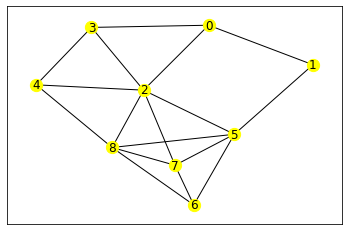

In [4]:
#G=nx.empty_graph(10)
dataset=[]
graphlist=[]

num_node_features=1
count1=0
totalnode=0
random.seed(2)
for numdata in range(1000):
  num_nodes=random.randint(1,30)
  totalnode+=num_nodes
  
  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(1,2*num_nodes))
  Cycle = nx.gnm_random_graph(num_nodes,p,seed=2)
  #numcycles=random.randint(1,6)
  #startind=random.randint(1,5)
  L=nx.cycle_basis(Cycle)
  #print(L)
  lis=list(set(list(flatten(L))))
  #print(lis)
  for l in lis:

    y[l]=0
 
  
  

 
  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)
  y=torch.from_numpy(y)
  y=y.long()
  data.y=y
  deg=Cycle.degree()
  deg=list(deg)
  deg=[deg[i][1] for i in range(num_nodes)]
  deg=torch.FloatTensor(deg)
  deg=torch.reshape(deg,(num_nodes,1))

  #print(deg.shape)
  
  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=deg
  dataset.append(data)

  #print(data.edge_index)


  
# illustrate graph
nx.draw_networkx(Cycle, node_size=150, node_color='yellow')
print(y)

print(count1)
print(totalnode)


Code below generates trees






tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
13298
13298


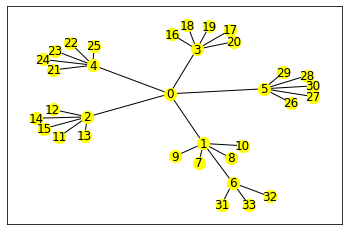

In [5]:
#G=nx.empty_graph(10)
#dataset=[]
#graphlist=[]

num_node_features=1
count1=0
totalnode=0
for numdata in range(500):
  num_nodes=random.randint(1,50)
  totalnode+=num_nodes
  
  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(1,5))
  Cycle = nx.full_rary_tree(p,num_nodes)
  #numcycles=random.randint(1,6)
  #startind=random.randint(1,5)
  L=nx.cycle_basis(Cycle)
  #print(L)
  lis=list(set(list(flatten(L))))
  #print(lis)
  for l in lis:

    y[l]=0
 
  
  

 
  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)
  y=torch.from_numpy(y)
  y=y.long()
  data.y=y
  deg=Cycle.degree()
  deg=list(deg)
  deg=[deg[i][1] for i in range(num_nodes)]
  deg=torch.FloatTensor(deg)
  deg=torch.reshape(deg,(num_nodes,1))

  #print(deg.shape)
  
  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=deg
  dataset.append(data)

  #print(data.edge_index)


  
# illustrate graph
nx.draw_networkx(Cycle, node_size=150, node_color='yellow')
print(y)

print(count1)
print(totalnode)


Code below generates wheel graphs

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
0
5851


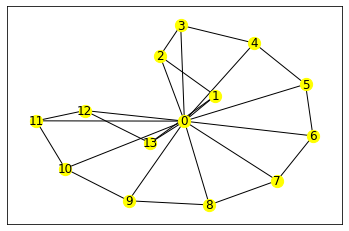

In [6]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(500):
  num_nodes=random.randint(3,20)
  totalnode+=num_nodes
  
  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(1,5))
  Cycle = nx.wheel_graph(num_nodes)
  #numcycles=random.randint(1,6)
  #startind=random.randint(1,5)
  L=nx.cycle_basis(Cycle)
  #print(L)
  lis=list(set(list(flatten(L))))
  
  #print(lis)
  for l in lis:

    y[l]=0
 
  
  

 
  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)
  y=torch.from_numpy(y)
  y=y.long()
  data.y=y
  deg=Cycle.degree()
  deg=list(deg)
  deg=[deg[i][1] for i in range(num_nodes)]
  deg=torch.FloatTensor(deg)
  deg=torch.reshape(deg,(num_nodes,1))

  #print(deg.shape)
  
  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=deg
  dataset.append(data)

  #print(data.edge_index)


  
# illustrate graph
nx.draw_networkx(Cycle, node_size=150, node_color='yellow')
print(y)

print(count1)
print(totalnode)

In [7]:
print(len(dataset))
random.shuffle(dataset)

2000


In [8]:
class GNNStack(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, task='node'):
        super(GNNStack, self).__init__()
        self.task = task
        self.convs = nn.ModuleList()
        self.convs.append(self.build_conv_model(input_dim, hidden_dim))
        self.lns = nn.ModuleList()
        self.lns.append(nn.LayerNorm(hidden_dim))
        self.lns.append(nn.LayerNorm(hidden_dim))
        for l in range(3):
            self.convs.append(self.build_conv_model(hidden_dim, hidden_dim))
            self.lns.append(nn.LayerNorm(hidden_dim))

        # post-message-passing
        self.post_mp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim), nn.Dropout(0.25), 
            nn.Linear(hidden_dim, output_dim))
        if not (self.task == 'node' or self.task == 'graph'):
            raise RuntimeError('Unknown task.')

        self.dropout = 0.25
        self.num_layers = 3

    def build_conv_model(self, input_dim, hidden_dim):
        # refer to pytorch geometric nn module for different implementation of GNNs.
        if self.task == 'node':
            return pyg_nn.GCNConv(input_dim, hidden_dim)
        else:
            return pyg_nn.GINConv(nn.Sequential(nn.Linear(input_dim, hidden_dim),
                                  nn.ReLU(), nn.Linear(hidden_dim, hidden_dim)))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        if data.num_node_features == 0:
          x = torch.ones(data.num_nodes, 1)

        for i in range(self.num_layers):
            x = self.convs[i](x, edge_index)
            emb = x
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            if not i == self.num_layers - 1:
                x = self.lns[i](x)

        if self.task == 'graph':
            x = pyg_nn.global_mean_pool(x, batch)

        x = self.post_mp(x)
        reward=F.softmax(x,dim=1)
        

        return emb,reward,F.log_softmax(x, dim=1)

    def loss(self, pred, label):
        return F.nll_loss(pred, label)
        #F.nll_loss(pred, label)

In [9]:
def train(dataset, task):
    torch.manual_seed(3)
    if task == 'graph':
        data_size = len(dataset)
        loader = DataLoader(dataset[:int(data_size * 0.8)], batch_size=64, shuffle=True)
        test_loader = DataLoader(dataset[int(data_size * 0.8):], batch_size=64, shuffle=True)
    else:
         loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # build model
    model = GNNStack(max(num_node_features, 1), 64, 2, task=task)
    opt = optim.Adam(model.parameters(), lr=0.01)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model=model.to(device)
    
    # train
    for epoch in range(100):
        total_loss = 0
        model.train()
        for batch in loader:
            #print(batch.train_mask, '----')
            opt.zero_grad()
            batch=batch.to(device)
            embedding,reward,pred = model(batch)
            
            label = batch.y
            #label=label.float()
            #labelonehot=torch.nn.functional.one_hot(label,num_classes=2)
            #labelonehot=labelonehot.float()
            #labelonehot=torch.zeros_like(label)
            #labelonehot=labelonehot.scatter(1,label, 1)
            
            loss = model.loss(pred, label)
            loss.backward()
            opt.step()
            total_loss += loss.item() * batch.num_graphs
        total_loss /= len(loader.dataset)
        #writer.add_scalar("loss", total_loss, epoch)

        if epoch % 20 == 0:
          print(epoch)
          #print(reward)
          print(loss*100)
          #print(pred.shape)
            #test_acc = test(test_loader, model)
            #print("Epoch {}. Loss: {:.4f}. Test accuracy: {:.4f}".format(
                #epoch, total_loss, test_acc))
            #writer.add_scalar("test accuracy", test_acc, epoch)

    return model




    

In [10]:
def test(loader, model, task='node'):
    model.eval()

    correct = 0
    total=0
    for data in loader:
        with torch.no_grad():
            emb, reward,pred = model(data)
            pred = pred.argmax(dim=1)
            label = data.y
            

        #if task == 'node':
            #mask = data.val_mask if is_validation else data.test_mask
            # node classification: only evaluate on nodes in test set
            #pred = pred[mask]
            #label = data.y[mask]
            
        correct += pred.eq(label).sum().item()
        total+=len(label)
    
    #if task == 'graph':
     #   total = len(loader.dataset) 
    #else:
        #total = len(loader.dataset)*50
        
    return correct / total,total,correct


Training the Classifier

In [11]:
task = 'node'

model = train(dataset, task)

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


0
tensor(20.7206, grad_fn=<MulBackward0>)
20
tensor(22.3719, grad_fn=<MulBackward0>)
40
tensor(27.6279, grad_fn=<MulBackward0>)
60
tensor(9.0178, grad_fn=<MulBackward0>)
80
tensor(11.4022, grad_fn=<MulBackward0>)


In [12]:
testloader=DataLoader(dataset[1801:], batch_size=1, shuffle=True)
accuracy,total,correct=test(testloader,model)
#embedding,reward,pred = model(data)
#pred=pred.argmax(dim=1)
#label=data.y
#correct=pred.eq(label).sum().item()
#total=len(label)
#accuracy=correct/total
print(accuracy)
print(total)
print(correct)


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


0.9871411483253588
3344
3301


Defining the Neighborhood Generator Policy Network

In [13]:
class GCNPolicy(torch.nn.Module):
  def __init__(self):
    super(GCNPolicy, self).__init__()
    self.conv1=GCNConv(num_gennode_features,num_hidden_features)
    self.conv2=GCNConv(num_hidden_features,num_hidden_features)
    self.conv3=GCNConv(num_hidden_features,num_gennode_features)
    self.lin1=nn.Sequential(nn.Linear((num_gennodes)*num_gennode_features, num_hidden_features),nn.ReLU(),nn.Linear(num_hidden_features,num_hidden_features),nn.ReLU(),nn.Linear(num_hidden_features,num_gennodes-1))
  def forward(self,gendata):
        x, edge_index = gendata.x, gendata.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x=F.relu(x)
        x=self.conv3(x,edge_index)
        x=F.relu(x)
        x=torch.flatten(x)
        x=self.lin1(x)
        x=F.softmax(x/temp)
        #x=Bernoulli(x)
        #action=x.sample()
       
        return x


Making templates and query nodes. Query nodes are in green and template nodes are red.

random p generated is 2
random p generated is 2
random p generated is 4
random p generated is 5
22
22


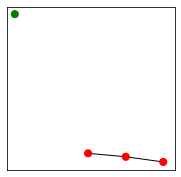

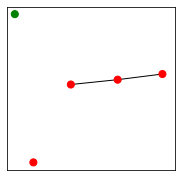

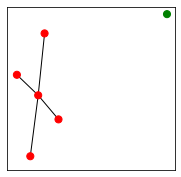

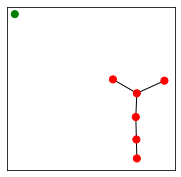

In [14]:

num_gennode_features=1
num_hidden_features=64
temp=0.1
dataset=[]
graphlist=[]

num_node_features=1
count1=0
totalnode=0
num_gennodes=4
po=3
graphlen=[]

for numdata in range(4):
 
  num_nodes=num_gennodes
  graphlen.append(num_nodes)
  k=num_gennodes-1
  totalnode+=num_nodes
  
  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])

  random.seed(po)
  p=math.ceil(random.uniform(1,5))
  
  print("random p generated is",p)
  Cycle = nx.gnm_random_graph(num_nodes-1,p,seed=3)
  Cycle.add_node(k)
  #numcycles=random.randint(1,6)
  #startind=random.randint(1,5)
  L=nx.cycle_basis(Cycle)
  #print(L)
  lis=list(set(list(flatten(L))))
  #print(lis)
  for l in lis:

    y[l]=0
 
  
  

 
  data=pyg_utils.from_networkx(Cycle)
  adj=data.edge_index
  #print("adjacency matrix")
  #print(adj)
  count1+=np.count_nonzero(y)
  y[num_nodes-1]=0
  #print(y)
  y=torch.from_numpy(y)
  y=y.long()
  data.y=y
  deg=Cycle.degree()
  deg=list(deg)
  deg=[deg[i][1] for i in range(num_nodes)]
  deg=torch.FloatTensor(deg)
  deg=torch.reshape(deg,(num_nodes,1))

  #print(deg.shape)
  
  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=deg
  dataset.append(data)
  graphlist.append(Cycle)

  #print(data.edge_index)


  
# illustrate graph
  color_map = []
  for node in Cycle:
      if node < num_gennodes-1:
          color_map.append('red')
      else: 
          color_map.append('green')      
#nx.draw(G, node_color=color_map, with_labels=True)
  plt.figure(numdata,figsize=(3,3))
  nx.draw_networkx(Cycle, node_size=50, node_color=color_map, with_labels=False)
  num_gennodes=num_gennodes+1
  po=po+1
print(count1)
print(totalnode)





In [15]:
emb,rew,pred=model(data)
print(rew)
print(pred.argmax(dim=1))
print(rew.argmax(dim=1))
print(data.y)

tensor([[3.3481e-13, 1.0000e+00],
        [3.3481e-13, 1.0000e+00],
        [5.4822e-10, 1.0000e+00],
        [1.4553e-10, 1.0000e+00],
        [9.7025e-10, 1.0000e+00],
        [4.9613e-15, 1.0000e+00],
        [4.0253e-21, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 0])


Below cell contains code for explainer training

In [16]:
def takeFirst(elem):
  return elem[0]


Generating Optimal Neighborhoods using the Policy Network

for loop newdegree counter
0
softmax
tensor([0.3544, 0.3410, 0.3046], grad_fn=<SoftmaxBackward0>)
explainer output
tensor(0)
degree of G while leaving for loop
[(0, 2), (1, 1), (2, 2), (3, 1)]
for loop newdegree counter
1
softmax
tensor([0.3544, 0.3410, 0.3046], grad_fn=<SoftmaxBackward0>)
explainer output
tensor(0)
degree of G while leaving for loop
[(0, 2), (1, 1), (2, 2), (3, 1)]
reward
2
reward
2
for loop newdegree counter
0
softmax
tensor([0.3544, 0.3410, 0.3046], grad_fn=<SoftmaxBackward0>)
explainer output
tensor(1)
degree of G while leaving for loop
[(0, 1), (1, 2), (2, 2), (3, 1)]
for loop newdegree counter
1
softmax
tensor([0.3544, 0.3410, 0.3046], grad_fn=<SoftmaxBackward0>)
explainer output
tensor(0)
degree of G while leaving for loop
[(0, 2), (1, 2), (2, 2), (3, 2)]
reward
2
reward
2
for loop newdegree counter
0
softmax
tensor([0.3544, 0.3410, 0.3046], grad_fn=<SoftmaxBackward0>)
explainer output
tensor(1)
degree of G while leaving for loop
[(0, 1), (1, 2), (2, 2), (3, 1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Streaming output truncated to the last 5000 lines.
degree of G while leaving for loop
[(0, 1), (1, 1), (2, 3), (3, 2), (4, 3), (5, 1), (6, 1)]
for loop newdegree counter
1
softmax
tensor([0.1355, 0.2864, 0.1797, 0.1461, 0.0766, 0.1757],
       grad_fn=<SoftmaxBackward0>)
explainer output
tensor(1)
degree of G while leaving for loop
[(0, 1), (1, 2), (2, 3), (3, 2), (4, 3), (5, 1), (6, 2)]
reward
2
reward
2
for loop newdegree counter
0
softmax
tensor([0.1355, 0.2864, 0.1797, 0.1461, 0.0766, 0.1757],
       grad_fn=<SoftmaxBackward0>)
explainer output
tensor(1)
degree of G while leaving for loop
[(0, 1), (1, 2), (2, 2), (3, 2), (4, 3), (5, 1), (6, 1)]
for loop newdegree counter
1
softmax
tensor([0.1355, 0.2864, 0.1797, 0.1461, 0.0766, 0.1757],
       grad_fn=<SoftmaxBackward0>)
explainer output
tensor(1)
degree of G while leaving for loop
[(0, 1), (1, 2), (2, 2), (3, 2), (4, 3), (5, 1), (6, 1)]
reward
2
reward
2
for loop newdegree counter
0
softmax
tensor([0.1355, 0.2864, 0.1797, 0.1461, 

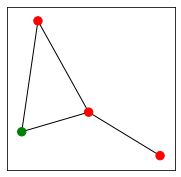

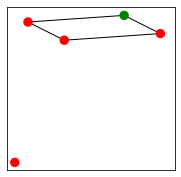

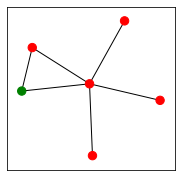

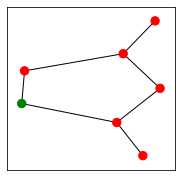

In [18]:

torch.manual_seed(4)
task='node'

temp=1
tesdat=[]

discount=1
  

classes=0 # set to 0 if node is part of a cycle else set to 1
loss1=nn.BCELoss()
newdegree=2
rollout=3
numepisodes=10

for j in range(len(dataset)):
  num_gennodes=graphlen[j]
  explainer=GCNPolicy()
  opt = torch.optim.Adam(explainer.parameters(), lr=1e-2)

  #explainer.train()
  
  for epoch in range(50):
      data=dataset[j]
      geph=nx.Graph()
      G=nx.Graph()
      geph=graphlist[j]
      G.add_nodes_from(geph)
      G.add_edges_from(geph.edges)
      #newdegree=2
      
      label=data.y
      newmask=torch.ones(num_gennodes-1)
      Actions=[]
      Rewards=[]
      States=[]
      DiscountedReturns=[]

      loss=0
      
      #print(label)
      for episodes in range(numepisodes):
        data=dataset[j]
        geph=nx.Graph()
        G=nx.Graph()
        geph=graphlist[j]
        G.add_nodes_from(geph)
        G.add_edges_from(geph.edges)
      #newdegree=2
      
        label=data.y
        Rewards=[]
        newmask=torch.ones(num_gennodes-1)

        for k in range(newdegree):
          #plt.figure()
          #nx.draw_networkx(G, node_size=150,with_labels=True, node_color='pink')
        
          rollmask=torch.ones(num_gennodes-1)
          print("for loop newdegree counter")
          print(k)
          output=explainer(data)
          States.append(data)
          print("softmax")
        
          print(output)
          #o=output.numpy()
          #o=np.multiply(o,newmask)
          #target=output*newmask
          #output=output*newmask
          #print(output)
          m = Categorical(output)
          #print(m)
          action = m.sample()
          print("explainer output")
          print(action)
          Actions.append(action)
          a=action.item()
          #output=output*newmask

          rollmask[a]=0
          G.add_edge(a,num_gennodes-1)
          deg1=G.degree()
          #print("degree of G while entering for loop")
          #print(deg1)
          reward=0
          #for r in range(rollout):
            #V=nx.Graph()
            #V.add_nodes_from(G)
            #V.add_edges_from(G.edges)
            #degroll=V.degree()
            #print("degree of V before rollout")
            #print(degroll)
            #degroll=list(degroll)
            #degroll.sort(key=takeFirst)
            #print(degroll)
            #degroll=[degroll[i][1] for i in range(num_gennodes)]
            #degcounter=degroll[num_gennodes-1]
            #degroll=torch.FloatTensor(degroll)
            #degroll=torch.reshape(deg,(num_gennodes,1))
            #rolldata=pyg_utils.from_networkx(V)
            #rolldata.x=degroll
            #plt.figure()
            #nx.draw_networkx(V, node_size=150,with_labels=True, node_color='white')
          
            #if(k!=newdegree-1):
              #rolloutput=explainer(rolldata)
              #rolloutput=rolloutput*rollmask
              #rollm=Categorical(rolloutput)
              #rollaction=rollm.sample()
              #rollaction=rollaction.item()
              #print("rollout action")
              #print(rollaction)
              #V.add_edge(rollaction,num_gennodes-1)
            #degroll=V.degree()
            #degroll=list(degroll)
            #degroll.sort(key=takeFirst)
            #print("degree of V after rollout")
            #print(degroll)
            #degroll=[degroll[i][1] for i in range(num_gennodes)]
            #degroll=torch.FloatTensor(degroll)
            #degroll=torch.reshape(deg,(num_gennodes,1))
            #rolldata=pyg_utils.from_networkx(V)
            #rolldata.x=degroll
            #rollemb,classifierreward,rollpred=model(rolldata)
            #pred=rollpred.argmax(dim=1)
            #reward+=(classifierreward[num_gennodes-1][classes]-0.5)*100
            #plt.figure()
            #nx.draw_networkx(V, node_size=150,with_labels=True, node_color='yellow')
            #pred.eq(label).sum().item()+
            #pred.eq(label).sum().item()
          #reward=reward/rollout
         
        
          
          deg=G.degree()
          deg=list(deg)
          deg.sort(key=takeFirst)
          print("degree of G while leaving for loop")
          print(deg)
          deg=[deg[i][1] for i in range(num_gennodes)]
          #print(deg)
          deg=torch.FloatTensor(deg)
          deg=torch.reshape(deg,(num_gennodes,1))
          newdata=pyg_utils.from_networkx(G)
          newdata.x=deg
          newdata.y=data.y
          #print(data.x)
          data=newdata
          #print(data.x)
          if(k!=newdegree-1):
            reward=0
          else:
            rollemb,classifierreward,rollpred=model(data)
            #print(classifierreward)
            reward=(classifierreward[num_gennodes-1][classes]-0.9)
          Rewards.append(reward)
          #emb1,rew1,pred1=model(data)
          #pred=pred1.argmax(dim=1)
          #reward2=(rew1[num_gennodes-1][classes]-0.5)
          #reward2=0
          #pred.eq(label).sum().item()+
          #reward=reward+reward2
          #opt.zero_grad()
          #loss+=-m.log_prob(action)*(reward)
          #if(epoch%10==0):
          #print("loss")
          #print(loss)
     #compute discounted returns
      #DiscountedReturns=[]
        for t in range(len(Rewards)):
          print("reward")
          print(len(Rewards))
          sum=0.0
          for v,r in enumerate(Rewards[t:]):
            sum+=r
          DiscountedReturns.append(sum)
      #print("DiscountedReturns")
      #print(DiscountedReturns)
      print(Rewards)
      #for x in range(1):
        
        #print("enter loss calculation")
        #States=torch.FloatTensor(States)
        #probs=explainer(States)
        #dist=torch.distributions.Categorical(probs=probs)
        #log_prob = dist.log_prob(Actions)
        #loss=-(log_prob*DiscountedReturns).sum()/num_episodes
        #opt.zero_grad()
        #opt.step()


      loss=0
      print("DiscountedReturns")
      print(len(DiscountedReturns))
      DiscountedReturns=torch.tensor(DiscountedReturns)
      DiscountedReturns=(DiscountedReturns-DiscountedReturns.mean())/(DiscountedReturns.std()+1e-9)
      #compute baseline for advantage functions
      b1=0
      b2=0
      ele=0
      ele1=0
      Advantage=[]
      countstep=0
      while(ele<len(DiscountedReturns)):
        if(ele%2==0):
          b1+=DiscountedReturns[ele]
          countstep+=1
        else:
          b2+=DiscountedReturns[ele]
        ele+=1
      b1=b1/countstep
      b2=b2/countstep
      while(ele1<len(DiscountedReturns)):
        if(ele1%2==0):
         Advantage.append(DiscountedReturns[ele1]-b1)
        else:
          Advantage.append(DiscountedReturns[ele1]-b2)
        ele1+=1
      print("Advantage Function")
      print(len(Advantage))

      


      for State, Action, R in zip(States, Actions, DiscountedReturns):
        print("return")
        print(R)
        probs = explainer(State)
        dist = torch.distributions.Categorical(probs=probs)    
        log_prob = dist.log_prob(Action)
        
        loss+= - log_prob*R
        
      newloss=loss/numepisodes
      print("loss")
      print(newloss)
      opt.zero_grad()
      newloss.backward()
      opt.step()
      
  color_map = []
  for node in G:
      if node < num_gennodes-1:
          color_map.append('red')
      else: 
          color_map.append('green')
  tesdat.append(data)
  plt.figure(j+1,figsize=(3,3))
  #plt.title("plot of figure %i"%classes)
  nx.draw_networkx(G, node_size=70,with_labels=False, node_color=color_map)

Evaluation of the class score after neighborhoods are generated

In [19]:
for i in range(len(tesdat)):
  rolldata=tesdat[i]
  rollemb,classifierreward,rollpred=model(rolldata)
  #print(rollpred)
  print(classifierreward[-1])
  print(rollpred.argmax(dim=1))

tensor([0.5835, 0.4165], grad_fn=<SelectBackward0>)
tensor([0, 1, 1, 0])
tensor([0.9327, 0.0673], grad_fn=<SelectBackward0>)
tensor([1, 0, 0, 0, 0])
tensor([0.7392, 0.2608], grad_fn=<SelectBackward0>)
tensor([1, 1, 1, 0, 1, 0])
tensor([0.6616, 0.3384], grad_fn=<SelectBackward0>)
tensor([1, 0, 0, 1, 1, 1, 0])
